# Simulation et découverte du traitement de la parole

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, clear_output, display

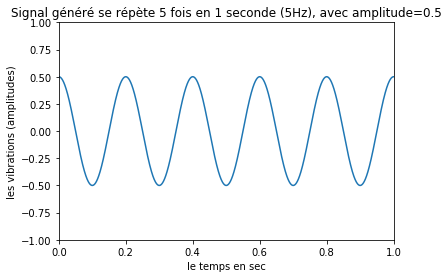

In [14]:
#cette fonction permet de générer un son d'une fréquence précise "freq" et amplitude "amp"
#avec une fréquence d'échantillonnage "fs" et de durée "duree"
def generer(freq, amp, fs, duree):
    t=np.arange(fs*duree)/fs        #les temps où générer des échantillons
    if(freq>0):
        data=amp*np.cos(2*np.pi*freq*t) #génération du son
    else:
        data=amp*np.random.uniform(-1,1,fs*duree) #générer du bruit aléatoire si freq<=0
    return data
    

#Exemple de génération d'un son de fréquence 5Hz (5 répétitions par seconde, il varie de 0 à fs/2)
#d'amplitude=0.5 (le volume de 0 à 1) 
#la fréquence d'échantillonnge = 22050 (nombre d'échantillons générés par seconde)
#la durée du signal généré est de 1 seconde
freq=5; amp=0.5; fs=22050; duree=1
data=generer(freq, amp, fs, duree)    

#dessiner le signal obtenu
plt.title('Signal généré se répète 5 fois en 1 seconde (5Hz), avec amplitude=0.5')
plt.xlabel('le temps en sec')
plt.ylabel('les vibrations (amplitudes)')
plt.axis([0,duree,-1,1])
t=np.arange(fs*duree)/fs
plt.plot(t,data); plt.show()  #dessiner le signal généré

In [52]:
#écouter un son de 2seconde d'une fréquence 100Hz, d'amplitude 0.3 échantillonné à 22KHz 
freq=100; amp=0.3; fs=22050; duree=2
data=generer(freq, amp, fs, duree)  #essayez de varier freq et amp pour voir 
Audio(data,rate=fs,autoplay=True,normalize=False) #écouter le son généré

In [57]:
#écouter un bruit aléatoire de 2 secondes d'amplitude = 0.2
freq=0; amp=0.2; fs=22050; duree=2
data=generer(freq, amp, fs, duree) 
Audio(data,rate=fs,autoplay=True,normalize=False)

# Expérience1: Simulez votre courbe psychoacoustique (réglez votre casque sur un volume moyen)
## Le générateur va générer des sons de fréquences et d'amplitudes variées. Il faut nous dire si vous arrivez à les entendre. Si le code bug (vous n'entendez plus rien, il faut juste rafraichir la page avec F5 et reprendre)

Expérience terminée


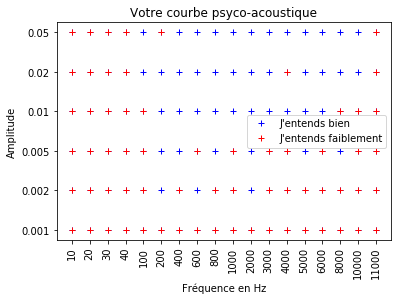

In [42]:
import tkinter as tk
from tkinter import ttk
from time import sleep

#fréquences à essayer
freqs=[10, 20, 30, 40, 100, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000, 11000]
#amplitudes à essayer
amps=[0.001,0.002,0.005, 0.01, 0.02, 0.05]

dur=1  #la durée en secondes de chaque son en secondes
fsamp=22050 #fréqence d'échantillonnage

freq_non_entendu=[]
amp_non_entendu=[]

#produit cartésien des 2 listes
tests=[(f, a) for f in freqs for a in amps]
#mélanger les tests aléatoirement
np.random.shuffle(tests)

i=0

#Ecouter le test actuel
def ecouter():
    clear_output() #supprimer le lecteur
    display(Audio(data,rate=fsamp,autoplay=True,normalize=False))
    #sleep(duree) #attendre que l'écoute se termine
    

#Passer au test suivant
def suivant():
    global i, fq, am, data
    if i<len(tests):
        progress['value']=int(100*i/len(tests))
        progress.update()
        fq, am = tests[i]
        i=i+1
        data=generer(freq=fq, amp=am, fs=fsamp, duree=dur)
        message['text'] = 'Test frequence: '+str(fq)+'Hz, amplitude: '+str(am)+' ('+str(i)+'/'+str(len(tests))+')'
    else:
        window.destroy()
        clear_output() #supprimer le lecteur
        print('Expérience terminée')
        affichage()

#je n'ai pas entendu le son
def ajouter():
    global freq_non_entendu, amp_non_entendu
    freq_non_entendu+=[fq] #ajouter le son non entendu à la liste
    amp_non_entendu+=[am]  
    suivant()
    
    
#Affichage du résultat obtenu
def affichage():
    fig, ax = plt.subplots(1,1) 

    x=[i for i in range(len(freqs)) for j in range(len(amps))]
    y=[j for i in range(len(freqs)) for j in range(len(amps))]
    plt.plot(x,y,'b+')

    nx=[freqs.index(f) for f in freq_non_entendu]
    ny=[amps.index(a) for a in amp_non_entendu]
    plt.plot(nx,ny,'r+')    

    plt.legend(["J'entends bien","J'entends faiblement"])

    ax.set_xticks(np.arange(len(freqs)))
    ax.set_xticklabels(freqs, rotation='vertical', fontsize=10)
    ax.set_yticks(np.arange(len(amps)))
    ax.set_yticklabels(amps,fontsize=10)

    plt.xlabel('Fréquence en Hz')
    plt.ylabel('Amplitude')
    plt.title('Votre courbe psyco-acoustique')
    plt.show()



############Affichage de l'interface ###############     
window = tk.Tk() 
window.geometry("500x200") 

message=tk.Label(window, text='Test frequence: xxxxHz, amplitude: xx.xx')
message.grid(row=0, column=0, columnspan=2)
tk.Button(window, text='Ecouter', command=ecouter).grid(row=0, column=2)

tk.Label(window, text=' ').grid(row=1, column=0)

tk.Button(window, text="J'entends bien", command=suivant).grid(row=2, column=0)
tk.Button(window, text="J'entends faiblement", command=ajouter).grid(row=2, column=2)

tk.Label(window, text=' ').grid(row=3, column=0)

progress = ttk.Progressbar(window, orient = tk.HORIZONTAL, length = 300, mode = 'determinate')
progress.grid(row=4, column=0, columnspan=3 )
progress['maximum'] = 100
progress['value'] = 0

suivant()
tk.mainloop() 

# Remarques:
nous remarquent dans cette experice que:
1 - les fréquences moins de 100 hz et supérieur de 10000 ne peuve pas être entendu 
2 - quand amptlitud converge vers maximum le son et plus audible et quand amplitude et faible le son et moins audible


# Expérience2: Simulez l'échelle logarithmique de l'oreille (réglez votre casque sur un volume moyen)
## Le générateur va générer des sons de fréquences variées. Il faut nous dire quelle est la différence que vous percevez.

Expérience terminée


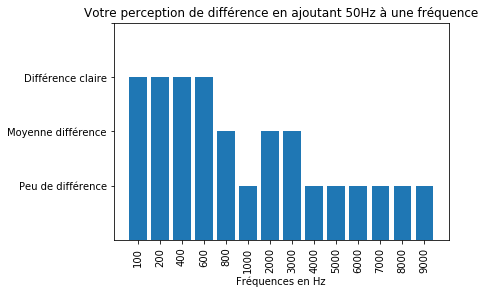

In [58]:
import tkinter as tk
from tkinter import ttk
from time import sleep
  
fs=22050  #fréquence d'échantillonnage
duree=1   #durée=1 seconde 

amp=[0.1,0.1,0.05,0.04,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01] #amplitudes
freqs=[100, 200, 400, 600, 800, 1000, 2000,3000,4000, 5000, 6000, 7000, 8000, 9000] #fréquences à tester
indices=np.arange(len(freqs))
np.random.shuffle(indices)  #mélange aléatoire des indices
reponses=np.zeros(len(freqs))
ind=0 


#écouter un son
def ecouter(son):
    display(Audio(son,rate=fs,autoplay=True,normalize=False)) #écouter
    sleep(duree) #attendre que l'écoute se termine
    clear_output() #supprimer le lecteur
    return son

#générer le son suivant
def suivant():
    global son1, son2, ind
    son1=generer(freqs[indices[ind]], amp[indices[ind]], fs, duree)     #comparer le son1 de freq
    son2=generer(freqs[indices[ind]]+50, amp[indices[ind]], fs, duree)  #avec son2 de freq+50Hz

    
#écouter le son1 
def ecouterson1():
    if ind<len(indices):
        print(freqs[indices[ind]],'Hz')
        ecouter(son1)
        
#écouter le son2 
def ecouterson2():
    if ind<len(indices):
        print(freqs[indices[ind]]+50,'Hz')
        ecouter(son2)    


#Affichage des résultats
def affichage():
    fig, ax = plt.subplots(1,1) 
    plt.bar(np.arange(len(reponses)),reponses)
    plt.xticks(np.arange(len(reponses)),freqs, rotation='vertical', fontsize=10)
    plt.yticks([1,2,3,4],['Peu de différence','Moyenne différence','Différence claire',''], fontsize=10)
    plt.xlabel('Fréquences en Hz')
    plt.title('Votre perception de différence en ajoutant 50Hz à une fréquence')
    plt.show()
    
    

#valider la réponse et passer à son suivant
def valider():
    global progress,ind
    if(ind<len(freqs)-1):
        reponses[indices[ind]]=reponse.get()
        ind=ind+1
        suivant()
        progress['value']=int(100*ind/len(freqs))
        progress.update()
    else:
        reponses[indices[ind]]=reponse.get()
        window.destroy()
        print('Expérience terminée')
        affichage()
    

#gestion des boutons exemples
def ecouter1():
    ecouter(generer(200, 0.1, fs, duree)) 
def ecouter2():
    ecouter(generer(400, 0.1, fs, duree)) 
def ecouter3():
    ecouter(generer(600, 0.1, fs, duree)) 
def ecouter4():
    ecouter(generer(800, 0.1, fs, duree)) 
def ecouter5():
    ecouter(generer(1000, 0.1, fs, duree)) 

    
############Affichage de l'interface ###############     
suivant()
window = tk.Tk() 
window.geometry("500x320") 

tk.Label(window, text="Exemples de sons").grid(row=0, column=0)

tk.Button(window, text='Ecouter 200Hz', command=ecouter1).grid(row=1, column=0)
tk.Button(window, text='Ecouter 400Hz', command=ecouter2).grid(row=2, column=0)
tk.Button(window, text='Ecouter 800Hz', command=ecouter3).grid(row=3, column=0)
tk.Button(window, text='Ecouter 600Hz', command=ecouter4).grid(row=4, column=0)
tk.Button(window, text='Ecouter 1000Hz', command=ecouter5).grid(row=5, column=0)

tk.Label(window, text="      ").grid(row=0, column=1)

tk.Label(window, text="Essayez d\'estimer la différence entre les 2 sons").grid(row=0, column=2, columnspan=2)
tk.Button(window, text='Ecouter son1', command=ecouterson1).grid(row=1, column=2)
tk.Button(window, text='Ecouter son2', command=ecouterson2).grid(row=1, column=3)

reponse = tk.IntVar()
reponse.set(1)
values = {"Peu de différence" : 1, "Moyenne différence" : 2, "Différence claire" : 3} 
i=2
for (text, value) in values.items(): 
    tk.Radiobutton(window, text = text, variable = reponse, value = value).grid(row=i, column=2, sticky="W") 
    i=i+1

tk.Button(window, text='Valider et suivant', command=valider).grid(row=i, column=2)

progress = ttk.Progressbar(window, orient = tk.HORIZONTAL, length = 150, mode = 'determinate')
progress.grid(row=i, column=3)
progress['maximum'] = 100
progress['value'] = 0

tk.mainloop() 

# Remarque:
 la relation entre la perception de différence et la fréquence et une relation inverse tell qu en remarquent plus les fréquences sans grand plus la perception de différence est petite (peu de différences) et plus les fréquences sont petites plus la perception de différence et grande (différence claire) et valable pour les fréquences moyennes